In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [1]:
import pandas as pd

df = pd.read_csv('/content/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-11,227.619995,229.059998,224.110001,225.410004,223.253189,30474000
1,2022-10-12,225.399994,227.860001,223.960007,225.750000,223.589951,21903900
2,2022-10-13,219.850006,236.100006,219.130005,234.240005,231.998718,42551800
3,2022-10-14,235.539993,237.240005,228.339996,228.559998,226.373047,30198600
4,2022-10-17,235.820007,238.960007,235.139999,237.529999,235.257217,28142300
...,...,...,...,...,...,...,...
246,2023-10-04,314.029999,320.040009,314.000000,318.959991,318.959991,20720100
247,2023-10-05,319.089996,319.980011,314.899994,319.359985,319.359985,16965600
248,2023-10-06,316.549988,329.190002,316.299988,327.260010,327.260010,25645500
249,2023-10-09,324.750000,330.299988,323.179993,329.820007,329.820007,19891200


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-10-11,225.410004
1,2022-10-12,225.750000
2,2022-10-13,234.240005
3,2022-10-14,228.559998
4,2022-10-17,237.529999
...,...,...
246,2023-10-04,318.959991
247,2023-10-05,319.359985
248,2023-10-06,327.260010
249,2023-10-09,329.820007


In [3]:
df['Date']

0      2022-10-11
1      2022-10-12
2      2022-10-13
3      2022-10-14
4      2022-10-17
          ...    
246    2023-10-04
247    2023-10-05
248    2023-10-06
249    2023-10-09
250    2023-10-10
Name: Date, Length: 251, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2022-10-11,225.410004
1,2022-10-12,225.750000
2,2022-10-13,234.240005
3,2022-10-14,228.559998
4,2022-10-17,237.529999
...,...,...
246,2023-10-04,318.959991
247,2023-10-05,319.359985
248,2023-10-06,327.260010
249,2023-10-09,329.820007


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-10-11
1     2022-10-12
2     2022-10-13
3     2022-10-14
4     2022-10-17
         ...    
246   2023-10-04
247   2023-10-05
248   2023-10-06
249   2023-10-09
250   2023-10-10
Name: Date, Length: 251, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2022-10-11,225.410004
2022-10-12,225.750000
2022-10-13,234.240005
2022-10-14,228.559998
2022-10-17,237.529999
...,...
2023-10-04,318.959991
2023-10-05,319.359985
2023-10-06,327.260010


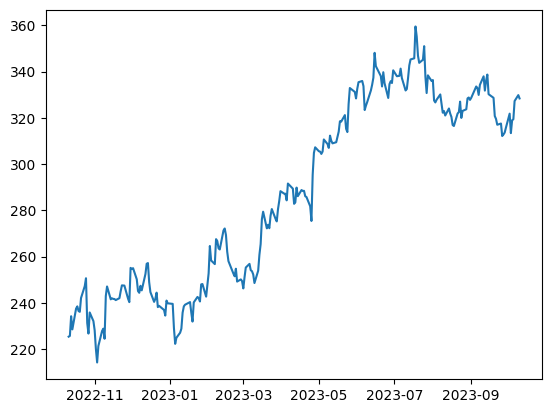

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

Error: Window of size 3 is too large for date 2021-03-25 00:00:00


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

(10,) (10, 2, 1) (10,)


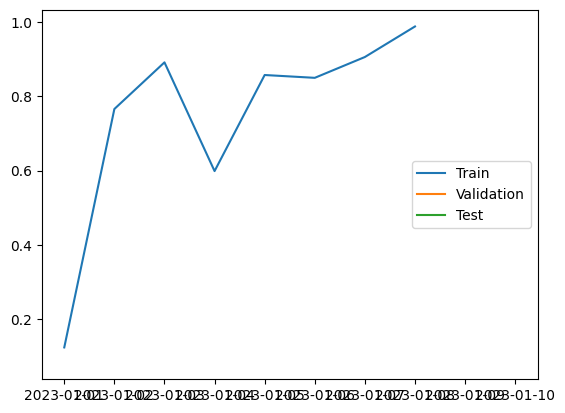

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((2, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.6450 - mean_absolute_error: 0.7592 - val_loss: 0.5437 - val_mean_absolute_error: 0.7374
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 0.6314 - mean_absolute_error: 0.7505 - val_loss: 0.5318 - val_mean_absolute_error: 0.7292
Epoch 3/100
1/1 [==============================] - 0s 48ms/step - loss: 0.6187 - mean_absolute_error: 0.7423 - val_loss: 0.5190 - val_mean_absolute_error: 0.7204
Epoch 4/100
1/1 [==============================] - 0s 57ms/step - loss: 0.6057 - mean_absolute_error: 0.7336 - val_loss: 0.5047 - val_mean_absolute_error: 0.7104
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 0.5920 - mean_absolute_error: 0.7244 - val_loss: 0.4910 - val_mean_absolute_error: 0.7007
Epoch 6/100
1/1 [==============================] - 0s 43ms/step - loss: 0.5779 - mean_absolute_error: 0.7150 - val_loss: 0.4780 - val_mean_absolute_error: 0.6914
Epoch 7/100
1/1 [=============

1/1 [==============================] - 1s 775ms/step


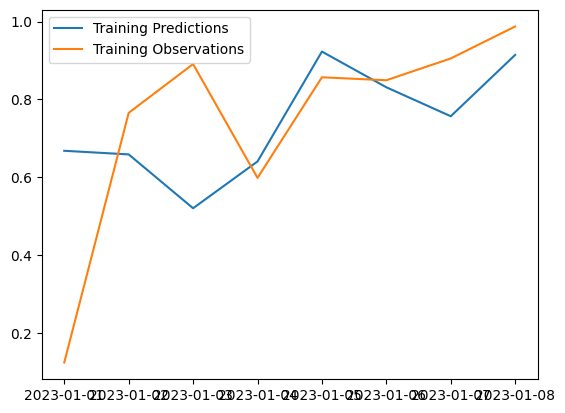

In [22]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


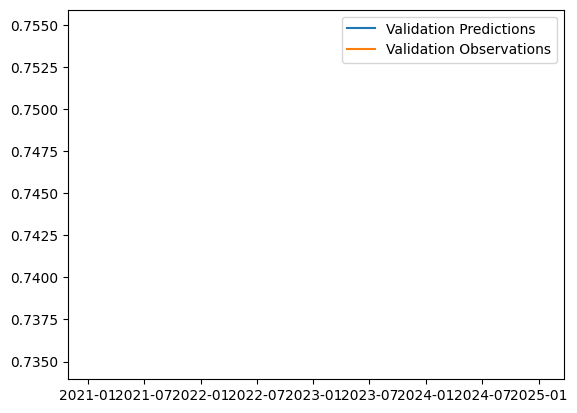

In [23]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


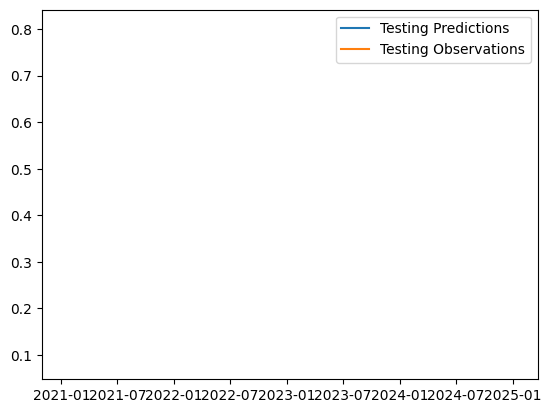

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

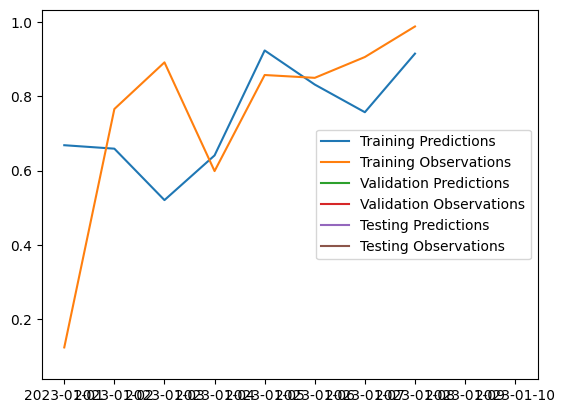

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [26]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


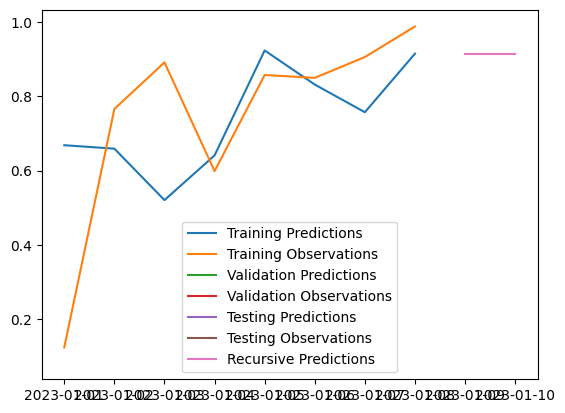

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])